<a href="https://colab.research.google.com/github/Shubham080997/Taxi_Surge_Pricing/blob/main/Taxi_surge_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT ON TAXI MOBILITY SURGE PRICE PREDICTION**

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers. The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.


● Trip_ID: ID for TRIP

● Trip_Distance: The distance for the trip requested by the customer

● TypeofCab: Category of the cab requested by the customer

● CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month

● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

● Customer_Rating: Average of lifetime ratings of the customer till date

● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for

modelling purposes

● Gender: Gender of the customer

● SurgePricingType: Target (can be of 3 types) - DV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
taxi_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 5/Week 1/Day 1/data_sigma_cabs.csv')

In [4]:
taxi_df.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3


In [5]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [6]:
taxi_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Trip_ID,131662,131662,T0005770041,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trip_Distance,131662,NaN,NaN,NaN,44.2009,25.5229,0.31,24.58,38.2,60.73,109.23
Type_of_Cab,111452,5,B,31136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Since_Months,125742,NaN,NaN,NaN,6.01666,3.62689,0,3,6,10,10
Life_Style_Index,111469,NaN,NaN,NaN,2.80206,0.225796,1.59638,2.65473,2.79805,2.94678,4.87511
Confidence_Life_Style_Index,111469,3,B,40355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination_Type,131662,14,A,77597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Rating,131662,NaN,NaN,NaN,2.84946,0.980675,0.00125,2.1525,2.895,3.5825,5
Cancellation_Last_1Month,131662,NaN,NaN,NaN,0.782838,1.03756,0,0,0,1,8
Var1,60632,NaN,NaN,NaN,64.2027,21.8204,30,46,61,80,210


In [7]:
taxi_df.duplicated().sum()

0

In [8]:
# Getting the info of null values
taxi_df.dropna().isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Trip_ID                      41608 non-null  bool 
 1   Trip_Distance                41608 non-null  bool 
 2   Type_of_Cab                  41608 non-null  bool 
 3   Customer_Since_Months        41608 non-null  bool 
 4   Life_Style_Index             41608 non-null  bool 
 5   Confidence_Life_Style_Index  41608 non-null  bool 
 6   Destination_Type             41608 non-null  bool 
 7   Customer_Rating              41608 non-null  bool 
 8   Cancellation_Last_1Month     41608 non-null  bool 
 9   Var1                         41608 non-null  bool 
 10  Var2                         41608 non-null  bool 
 11  Var3                         41608 non-null  bool 
 12  Gender                       41608 non-null  bool 
 13  Surge_Pricing_Type           41608 non-null  

In [9]:
# Checking of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculating the VIF factor
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
# Getting the VIF factor for the variable
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['Surge_Pricing_Type']]].dropna())

,variables,VIF
0,Trip_Distance,4.873858
1,Customer_Since_Months,4.024759
2,Life_Style_Index,145.365898
3,Customer_Rating,12.332220
4,Cancellation_Last_1Month,1.648301
5,Var1,9.124250
6,Var2,156.300582
7,Var3,89.595027


In [11]:
# Dropping the Trip_Id column as it is not of much importance
taxi_df.drop(columns=['Trip_ID'],inplace=True)

In [12]:
taxi_df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

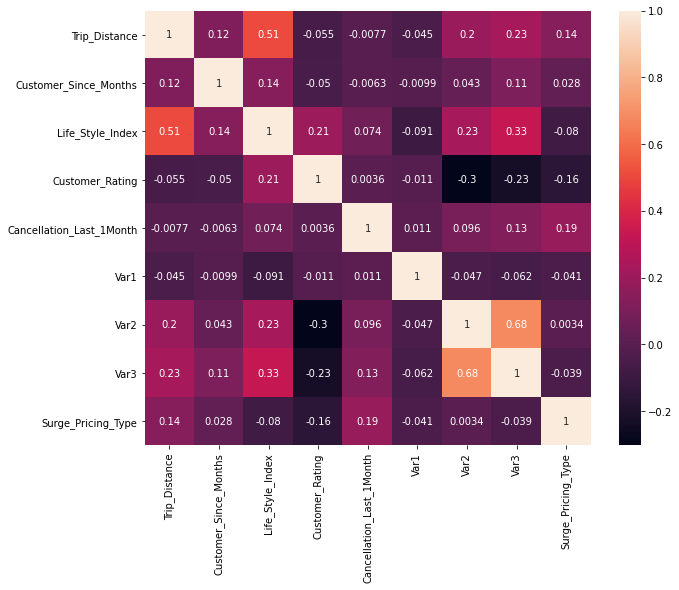

In [13]:
# Getting the correlation details
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(taxi_df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e098bd9d0>,
      dtype=object)

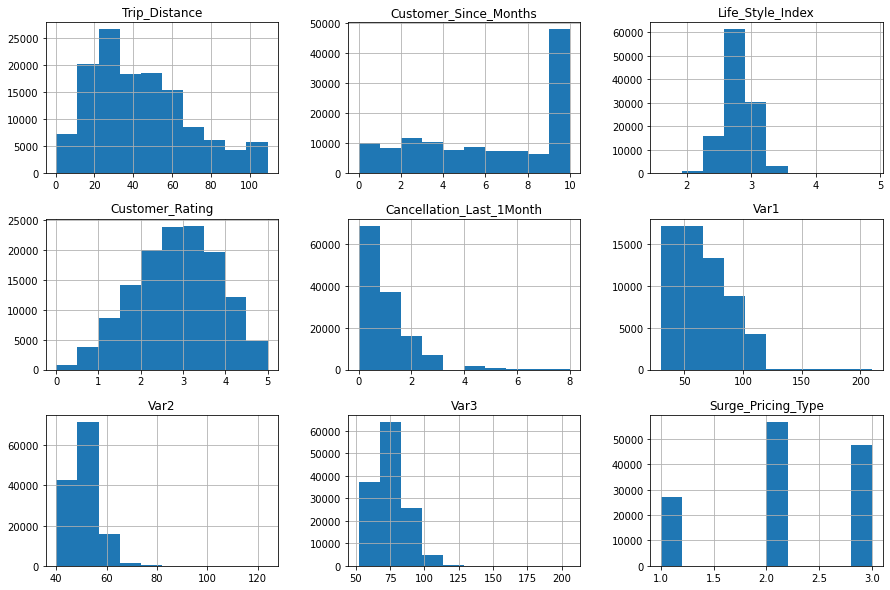

In [14]:
taxi_df.hist(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


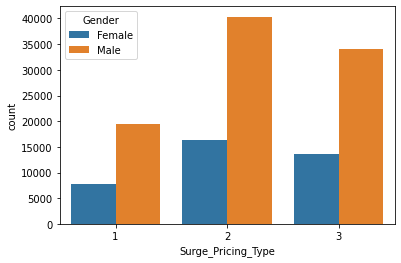

In [15]:
sns.countplot(taxi_df['Surge_Pricing_Type'],hue=taxi_df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


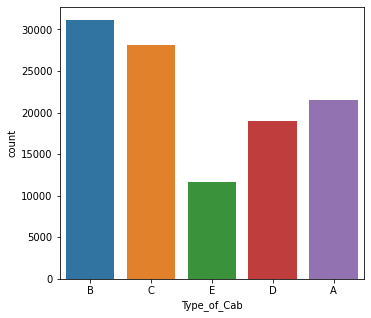

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(taxi_df['Type_of_Cab'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


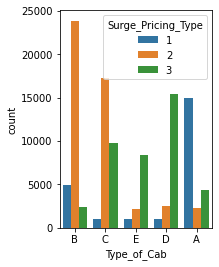

In [17]:
plt.subplot(1,2,2)
sns.countplot(taxi_df['Type_of_Cab'],hue=taxi_df['Surge_Pricing_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


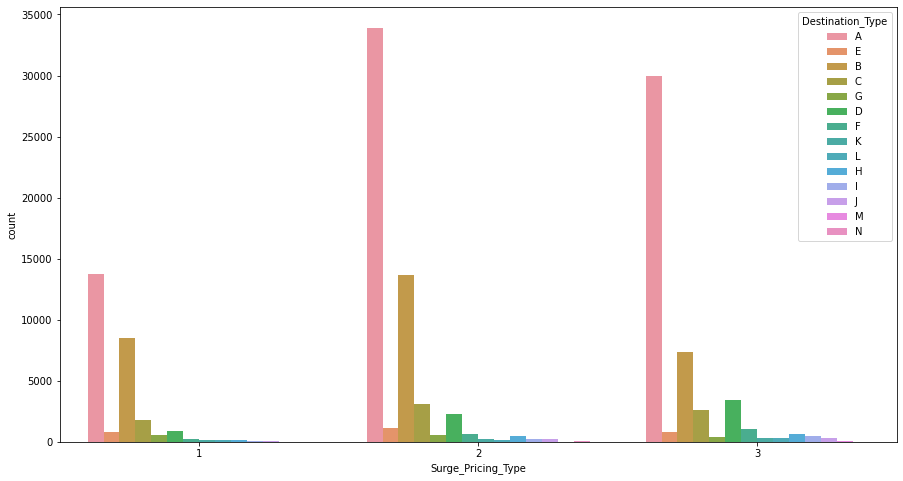

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(taxi_df['Surge_Pricing_Type'],hue=taxi_df['Destination_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


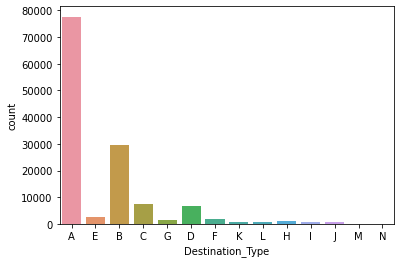

In [19]:
sns.countplot(taxi_df['Destination_Type'])

In [20]:
taxi_df.groupby(['Destination_Type'])['Surge_Pricing_Type'].value_counts()

Destination_Type  Surge_Pricing_Type
A                 2                     33913
                  3                     29932
                  1                     13752
B                 2                     13681
                  1                      8477
                  3                      7397
C                 2                      3093
                  3                      2613
                  1                      1778
D                 3                      3468
                  2                      2260
                  1                       860
E                 2                      1101
                  1                       820
                  3                       796
F                 3                      1061
                  2                       626
                  1                       263
G                 2                       597
                  1                       529
                  3                       3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


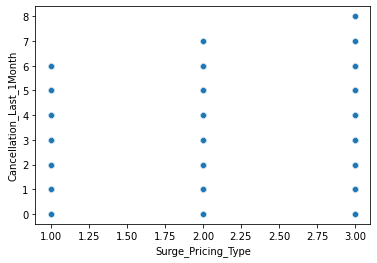

In [21]:
sns.scatterplot(taxi_df['Surge_Pricing_Type'],taxi_df['Cancellation_Last_1Month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


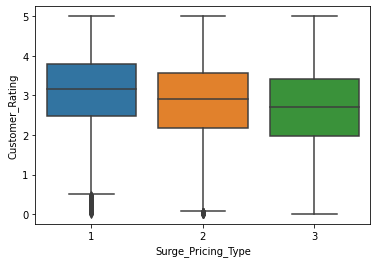

In [22]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Customer_Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


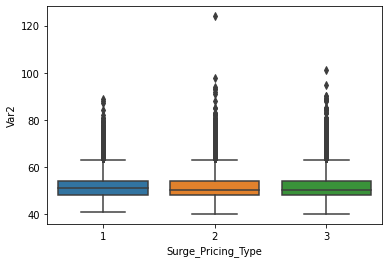

In [23]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Var2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


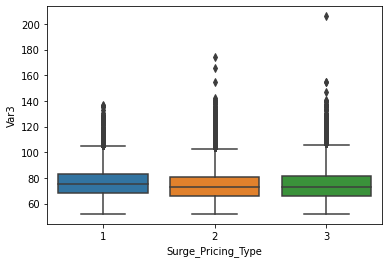

In [24]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Var3'])

Data Cleaning and Handling Null Values


In [25]:
taxi_df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [26]:
del taxi_df['Var1']

In [27]:
# Imputation of all the null values
taxi_df['Type_of_Cab']=taxi_df['Type_of_Cab'].fillna(taxi_df['Type_of_Cab'].mode().iloc[0])
taxi_df['Customer_Since_Months']=taxi_df['Customer_Since_Months'].fillna(taxi_df['Customer_Since_Months'].median())
taxi_df['Life_Style_Index']=taxi_df['Life_Style_Index'].fillna(taxi_df['Life_Style_Index'].median())
taxi_df['Confidence_Life_Style_Index']=taxi_df['Confidence_Life_Style_Index'].fillna(taxi_df['Confidence_Life_Style_Index'].mode().iloc[0])
#taxi_df['Var1']=taxi_df['Var1'].fillna(taxi_df['Var1'].median())

In [28]:
taxi_df.isna().any()

Trip_Distance                  False
Type_of_Cab                    False
Customer_Since_Months          False
Life_Style_Index               False
Confidence_Life_Style_Index    False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
dtype: bool

In [29]:
# Using label encoder to change the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [30]:
taxi_df['Type_of_Cab']=encoder.fit_transform(taxi_df['Type_of_Cab'])
taxi_df['Confidence_Life_Style_Index']=encoder.fit_transform(taxi_df['Confidence_Life_Style_Index'])
taxi_df['Destination_Type']=encoder.fit_transform(taxi_df['Destination_Type'])
taxi_df['Gender']=encoder.fit_transform(taxi_df['Gender'])

In [31]:
taxi_df.dtypes

Trip_Distance                  float64
Type_of_Cab                      int64
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index      int64
Destination_Type                 int64
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                           int64
Surge_Pricing_Type               int64
dtype: object

**Visualisation**(After treating null values)

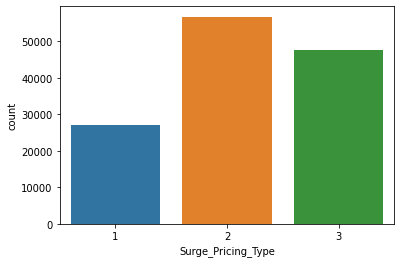

In [32]:
sns.countplot(x=taxi_df['Surge_Pricing_Type'])

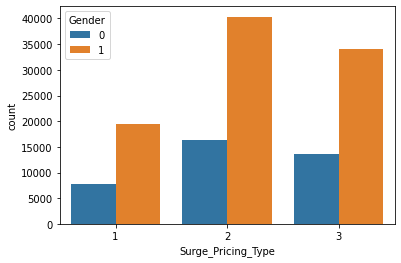

In [33]:
sns.countplot(x=taxi_df['Surge_Pricing_Type'],hue=(taxi_df['Gender']))

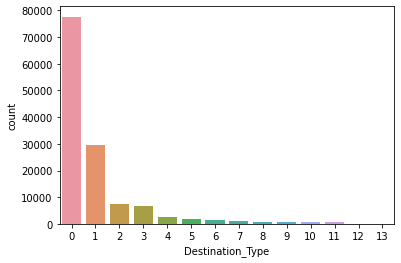

In [34]:
sns.countplot(x=taxi_df['Destination_Type'])

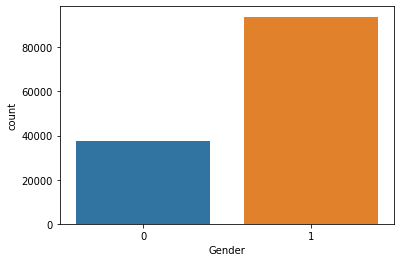

In [35]:
sns.countplot(x=taxi_df['Gender']) # 1 for male; 0 for Female

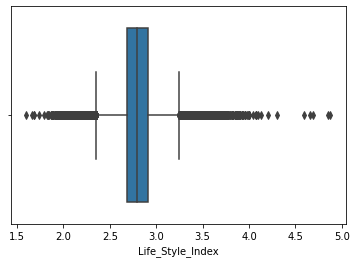

In [36]:
sns.boxplot(x=taxi_df['Life_Style_Index'])

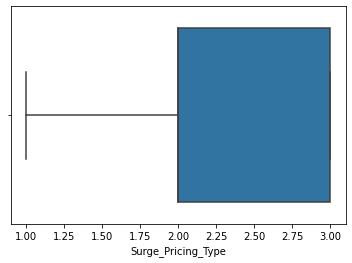

In [37]:
sns.boxplot(x=taxi_df['Surge_Pricing_Type'])

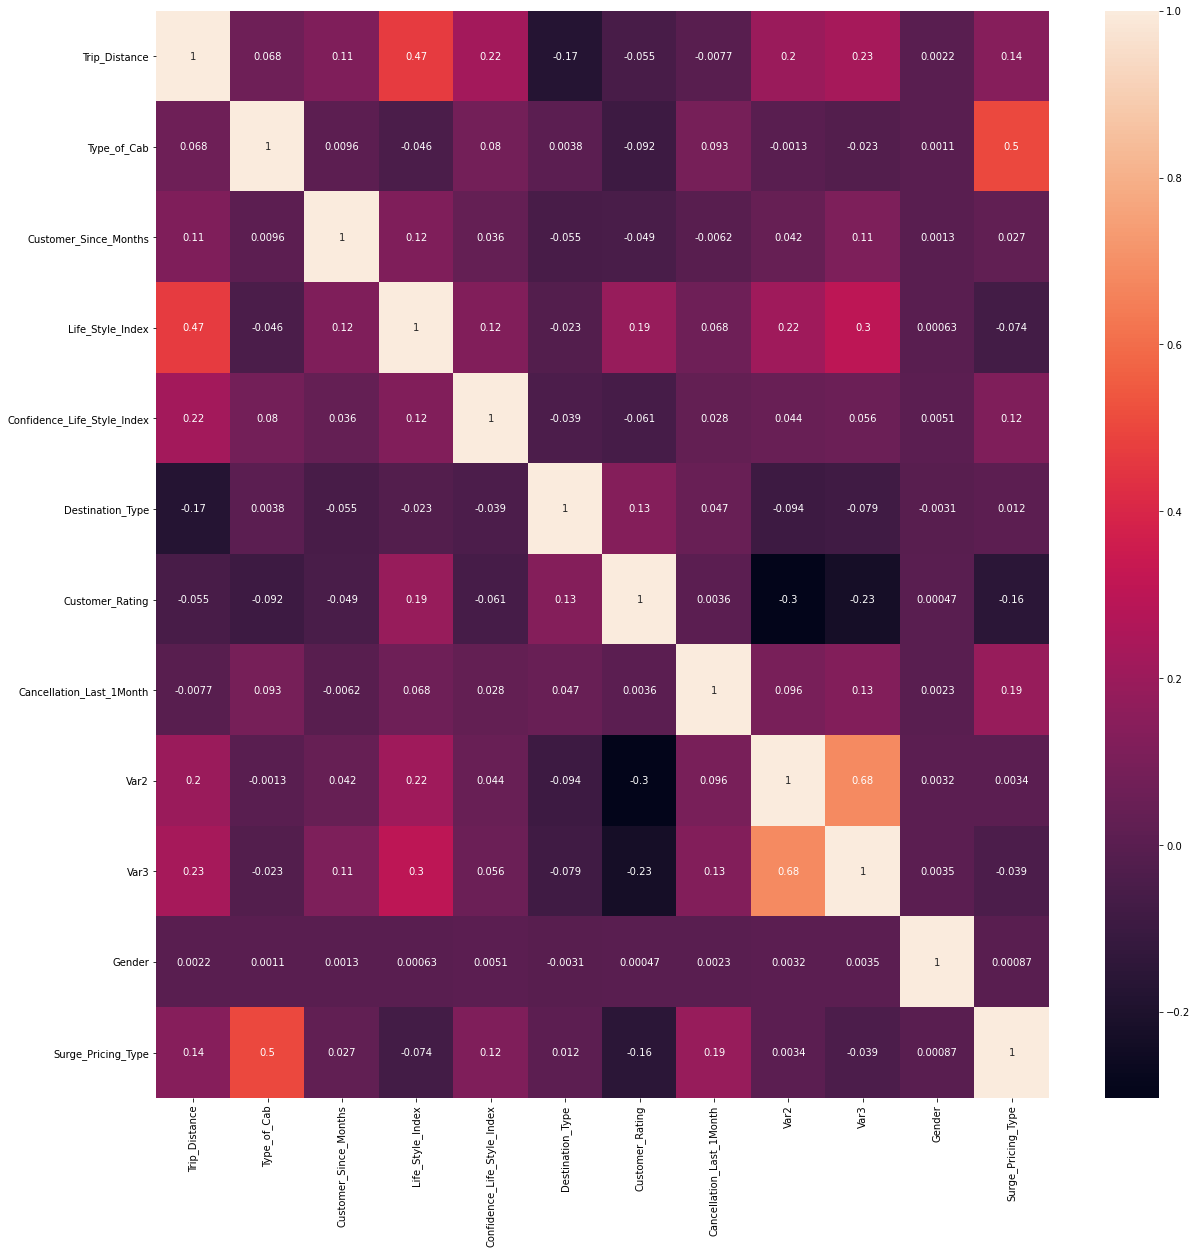

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(taxi_df.corr(),annot=True)

**Feature Selection**


In [39]:
#Creating the predictors and target
x=taxi_df.iloc[:,taxi_df.columns !='Surge_Pricing_Type']
y=taxi_df['Surge_Pricing_Type']
x.shape

(131662, 11)

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()

In [41]:
ET.fit(x,y)
imp_features=pd.Series(ET.feature_importances_,index=x.columns).sort_values(ascending=False)
imp_features
#The features with the lowest scores can be removed.

Type_of_Cab                    0.251941
Trip_Distance                  0.124387
Customer_Rating                0.117766
Life_Style_Index               0.109318
Var3                           0.106025
Var2                           0.096738
Customer_Since_Months          0.069605
Destination_Type               0.044611
Cancellation_Last_1Month       0.037499
Confidence_Life_Style_Index    0.022914
Gender                         0.019197
dtype: float64

<function matplotlib.pyplot.show>

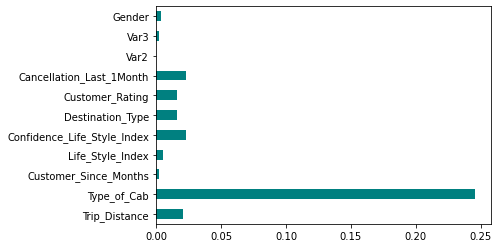

In [42]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

data = mutual_info_classif(x,y)
data1 = pd.Series(data, taxi_df.columns[0:len(taxi_df.columns)-1])
data1.plot(kind= 'barh', color = 'teal')
plt.show

In [43]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [55]:
y.shape

(131662,)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.shape

(92163,)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)
x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)
xs_test = scaler.fit_transform(x_test)

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=200)


In [54]:
y_train

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender
28027,7.26,4,2.0,2.43140,2,0,2.17625,1,53,68,1
129872,47.65,0,9.0,2.97616,0,0,2.98375,0,55,78,1
32396,28.83,3,2.0,2.52195,0,0,3.30000,0,50,74,0
63846,30.97,1,4.0,2.64378,0,0,3.69375,0,54,69,1
83862,3.40,0,8.0,2.65630,2,7,2.73375,0,47,70,1
...,...,...,...,...,...,...,...,...,...,...,...
125729,106.83,1,8.0,2.95027,1,1,3.34375,0,46,60,1
95864,18.41,1,0.0,2.46388,2,0,4.11000,1,46,57,0
34005,45.16,0,10.0,2.89736,0,0,2.03750,2,58,92,1
76656,25.31,1,8.0,2.91622,2,6,3.87000,0,50,98,1


In [71]:
model = log.fit(x_train,y_train)
y_pred1 = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
accuracy_score(y_test,y_pred1)*100

64.48770854958353